In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [28]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [26]:
# Get the columns and the rows that are not null.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [27]:
ride_data_df["city"].value_counts()

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
                   ..
Penaborough         5
Randallchester      5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64

In [32]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city","city"], how="left")
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [43]:
# Urban Cities dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]

# Suburban Cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]

# Rural Cities
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

# Number of rides for cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [45]:
# Average fares for cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [47]:
# Average number of drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

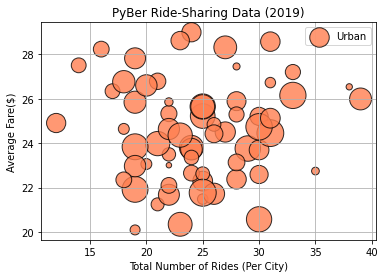

In [59]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            facecolor="coral", edgecolor="k", linewidth=1,
            alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

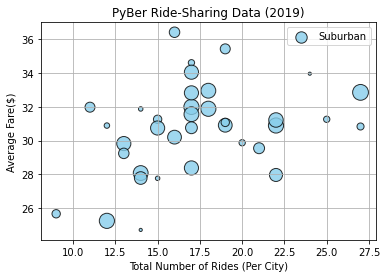

In [62]:
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            facecolor="skyblue", edgecolor="k", linewidth=1,
            alpha=0.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

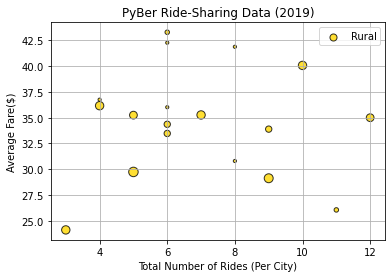

In [63]:
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            facecolor="gold", edgecolor="k", linewidth=1,
            alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

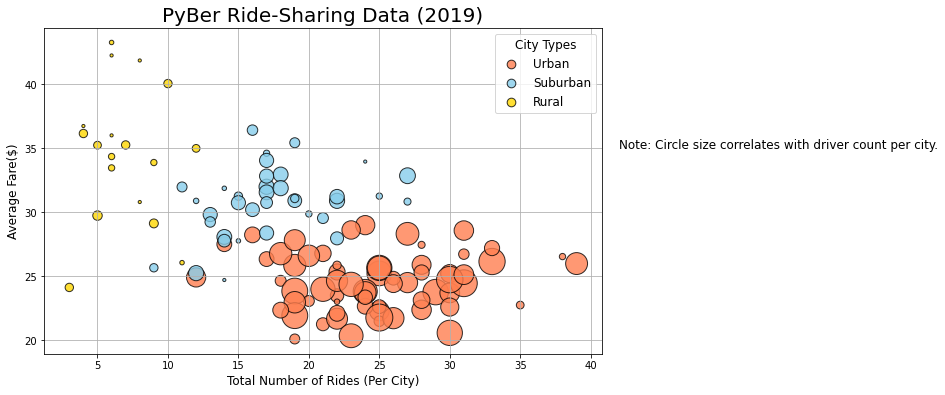

In [80]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, 
            facecolor="coral", edgecolor="k", linewidth=1,
            alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, 
            facecolor="skyblue", edgecolor="k", linewidth=1,
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, 
            facecolor="gold", edgecolor="k", linewidth=1,
            alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid(True)
lgnd=plt.legend(fontsize=12, mode="Expanded",
               scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize=12)

plt.savefig("Analysis/Fig1.png")
plt.show()